
# S05_T01: Transformació Registre Log amb Regular expressions
## Descripció:
L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.

## Nivell 1:
L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".




### Exercici 1:
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [1]:
# Importamos las librerias:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Abrimos los registros-logs proporcionados
dflog = pd.read_table(r'..\..\Data-Science\Data-sources\Web_access_log-akumenius.com.txt', names=['Registros'])
# Añadimos la siguiente configuración para poder visualizar todos los datos de las tablas:
pd.set_option('display.max_columns', None)
dflog

,Registros
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


In [3]:
# Separaremos la información en diferentes columnas. Empezamos por lo que parece el punto de entrada del registro. Añadimos una columna "Origen" y otra "IP", con el n = 2 del split
dflogs = dflog['Registros'].str.split(' ', n=2, expand=True) #Usamos un df de soporte. "logs" 

dflog['Origen'] = dflogs[0]
dflog['IP'] = dflogs[1]
dflog

,Registros,Origen,IP
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1
...,...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com,5.255.253.53
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com,74.86.158.107
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1


In [4]:
# Eliminamos este primer split de la tabla de soporte:
dflogs.drop(dflogs.columns[[0,1]], axis=1, inplace=True)
dflogs

,2
0,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
2,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
3,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
4,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
...,...
261868,"- - [02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1..."
261869,"- - [02/Mar/2014:03:09:52 +0100] ""HEAD / HTTP/..."
261870,"- - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HT..."
261871,"- - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HT..."


In [5]:
# Vamos con la fecha. Con la expresión '\[(.*?)\]', extraeremos lo que haya dentro de los corchetes en una nueva columna "Fecha" en dflog
dflog['Fecha'] = dflogs[2].str.extract(r'\[(.*?)\]', expand = True)
dflog

,Registros,Origen,IP,Fecha
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100
...,...,...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100


In [6]:
# Ahora extraeremos la última "columna" de los registros con rsplit
a = dflogs[2].str.rsplit(n = 1, expand = False)
dflog['Last'] = a[0][1] # seguramente haya alguna otra forma más eficiente de realizar este paso
del a
dflogs

,2
0,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
2,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
3,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
4,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
...,...
261868,"- - [02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1..."
261869,"- - [02/Mar/2014:03:09:52 +0100] ""HEAD / HTTP/..."
261870,"- - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HT..."
261871,"- - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HT..."


In [7]:
# Nos falta extraer la información que aparece entrecomillada. Parece que puede haber diferente número de "grupos"
# para extraer lo de dentro de las comillas: r'([\"\'])(.*?)\1' 
dflog[["Texto 1", "Texto 2", "Texto 3", "Texto 4"]] = pd.DataFrame(dflogs[2].str.findall(r'([\"\'])(.*?)\1').tolist())
dflog["Puerto"] = pd.DataFrame(dflogs[2].str.findall(r' \d+')) # con este extraemos los "puertos" que aparecen fuera de los encomillados
print(dflog.info())
dflog.loc[50:70]

#Haciendolo de esta manera, nos ha generado listas en las columnas del dataframe. Esto lo corregiremos después


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Registros  261873 non-null  object
 1   Origen     261873 non-null  object
 2   IP         261873 non-null  object
 3   Fecha      261873 non-null  object
 4   Last       261873 non-null  object
 5   Texto 1    261873 non-null  object
 6   Texto 2    261873 non-null  object
 7   Texto 3    261873 non-null  object
 8   Texto 4    2 non-null       object
 9   Puerto     261873 non-null  object
dtypes: object(10)
memory usage: 20.0+ MB
None


,Registros,Origen,IP,Fecha,Last,Texto 1,Texto 2,Texto 3,Texto 4,Puerto
50,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:15 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hotel-Hilton-...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 404, 3100]"
51,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:16 +0100,VLOG=-,"("", GET /destinos-baratos/destinosEstrelles/ho...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 8817]"
52,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:17 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hotel-Luna-Al...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 6118]"
53,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:20 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hotel-Cisnero...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 404, 3100]"
54,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:22 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hoteles-todo-...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 6708]"
55,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:23 +0100,VLOG=-,"("", GET /destinos-baratos/destinosEstrelles/ho...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 8812]"
56,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:25 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hoteles-todo-...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 5645]"
57,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:27 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hoteles-todo-...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 6144]"
58,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:27 +0100,VLOG=-,"("", GET /destinosEstrelles/hoteles-en-Muchamie...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 8806]"
59,www.akumenius.com 66.249.76.216 - - [23/Feb/20...,www.akumenius.com,66.249.76.216,23/Feb/2014:03:11:29 +0100,VLOG=-,"("", GET /hoteles-baratos/ofertas-hoteles-todo-...","("", -)","("", Mozilla/5.0 (compatible; Googlebot/2.1; +h...",None,"[ 200, 4261]"


## Nivell 2:



### - Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [8]:
# Vamos a cambiar el tipo de la información de la columna "Fecha". Ahora mismo es un str, para poder trabajar a posteriori lo cambiaremos a date
type(dflog["Fecha"][0])

str

In [9]:
# El formato actual es: 23/Feb/2014:03:11:15 +0100, para transformarlo utilizaremos el formato siguiente: '%d/%b/%Y:%H:%M:%S %z'
dflog["Fecha"] = pd.to_datetime(dflog["Fecha"], format = r'%d/%b/%Y:%H:%M:%S %z')
dflog

,Registros,Origen,IP,Fecha,Last,Texto 1,Texto 2,Texto 3,Texto 4,Puerto
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,VLOG=-,"("", GET / HTTP/1.1)","("", -)","("", Mozilla/5.0 (compatible; YandexBot/3.0; +h...",None,"[ 200, 7528]"
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,VLOG=-,"("", HEAD / HTTP/1.1)","("", -)","("", Mozilla/5.0+(compatible; UptimeRobot/2.0; ...",None,[ 200]
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]


In [10]:
# Eliminaremos la columna "Registros"
dflog = dflog.drop("Registros", axis = 1)
dflog

,Origen,IP,Fecha,Last,Texto 1,Texto 2,Texto 3,Texto 4,Puerto
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,VLOG=-,"("", GET / HTTP/1.1)","("", -)","("", Mozilla/5.0 (compatible; YandexBot/3.0; +h...",None,"[ 200, 7528]"
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,VLOG=-,"("", HEAD / HTTP/1.1)","("", -)","("", Mozilla/5.0+(compatible; UptimeRobot/2.0; ...",None,[ 200]
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,"("", OPTIONS * HTTP/1.0)","("", -)","("", Apache (internal dummy connection))",None,[ 200]


In [11]:
# Como hemos comentado antes, tal y cómo hemos hecho la extracción de datos nos ha generado listas en algunas columnas. Vamos a corregirlo (habrá maneras más eficientes de hacerlo)
a = dflog['Texto 1'].apply(pd.Series) 
a.describe() # comprobamos que el primer valor de la lista era siempre una comilla, por lo que descartamos la primera columna de "a"

,0,1
count,261873,261873
unique,1,66764
top,"""",OPTIONS * HTTP/1.0
freq,261873,13892


In [12]:
# y sustituimos en el df original
dflog['Texto 1'] = a[1]
dflog

,Origen,IP,Fecha,Last,Texto 1,Texto 2,Texto 3,Texto 4,Puerto
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,VLOG=-,GET / HTTP/1.1,"("", -)","("", Mozilla/5.0 (compatible; YandexBot/3.0; +h...",None,"[ 200, 7528]"
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,VLOG=-,HEAD / HTTP/1.1,"("", -)","("", Mozilla/5.0+(compatible; UptimeRobot/2.0; ...",None,[ 200]
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,OPTIONS * HTTP/1.0,"("", -)","("", Apache (internal dummy connection))",None,[ 200]


In [13]:
# Hacemos lo mismo con las otras columnas (esta operación tarda un poquito!):
a = dflog['Texto 2'].apply(pd.Series) 
b = dflog['Texto 3'].apply(pd.Series) 
c = dflog['Texto 4'].apply(pd.Series) 
d = dflog['Puerto'].apply(pd.Series)

In [14]:
print(f'Resumen texto 2: \n {a.describe()}')
print(f'Resumen texto 3: \n  {b.describe()}')
print(f'Resumen texto 4: \n  {c.describe()}')
print(f'Resumen Puerto: \n {d.describe()}')

Resumen texto 2: 
              0       1
count   261873  261873
unique       1    2509
top          "       -
freq    261873   99545
Resumen texto 3: 
               0                                                  1
count   261873                                             261873
unique       1                                                735
top          "  Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
freq    261873                                              50914
Resumen texto 4: 
          0                                                  1
count   2                                                  2
unique  1                                                  1
top     "  Mozilla/5.0 (compatible; AhrefsBot/5.0; +http:...
freq    2                                                  2
Resumen Puerto: 
             0       1       2      3      4      5      6     7     8     9   \
count   261873  230886  140812  26344  13712  12793  11922  8249  3201  1776   
unique      1

In [15]:
# Vemos que en los textos 2, 3 y 4, la primera columna son las comillas por lo que podemos hacer lo mismo que con el texto 1
dflog['Texto 2'] = a[1]
dflog['Texto 3'] = b[1]
dflog['Texto 4'] = c[1]
dflog

,Origen,IP,Fecha,Last,Texto 1,Texto 2,Texto 3,Texto 4,Puerto
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,VLOG=-,GET / HTTP/1.1,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,NaN,"[ 200, 7528]"
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,VLOG=-,HEAD / HTTP/1.1,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,NaN,[ 200]
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,OPTIONS * HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]


In [16]:
# Separaremos la información de "Texto 1"
text1 = dflog["Texto 1"].str.split(" ", expand=True)
text1.columns = ["Petición", "Caracter", "HTTP"] # Separamos las columnas en un nuevo dataframe "Text1" y les ponemos nombre
text1

,Petición,Caracter,HTTP
0,OPTIONS,*,HTTP/1.0
1,OPTIONS,*,HTTP/1.0
2,OPTIONS,*,HTTP/1.0
3,OPTIONS,*,HTTP/1.0
4,OPTIONS,*,HTTP/1.0
...,...,...,...
261868,GET,/,HTTP/1.1
261869,HEAD,/,HTTP/1.1
261870,OPTIONS,*,HTTP/1.0
261871,OPTIONS,*,HTTP/1.0


In [17]:
# Añadimos las columnas separadas al df original
dflog.insert(4, "Petición", text1["Petición"])
dflog.insert(5, "Caracter", text1["Caracter"])
dflog.insert(6, "HTTP", text1["HTTP"]) # Insertamos las columnas de text1 al dflog
dflog = dflog.drop("Texto 1", axis = 1) # Eliminamos la columna Texto 1 para no tener información redundante
dflog

,Origen,IP,Fecha,Last,Petición,Caracter,HTTP,Texto 2,Texto 3,Texto 4,Puerto
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,VLOG=-,GET,/,HTTP/1.1,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,NaN,"[ 200, 7528]"
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,VLOG=-,HEAD,/,HTTP/1.1,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,NaN,[ 200]
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,[ 200]


In [18]:
d.columns = ["Puerto0", "Puerto1", "Puerto2", "Puerto3", "Puerto4", "Puerto5", "Puerto6", "Puerto7", "Puerto8", "Puerto9", "Puerto10", "Puerto11"]
d

,Puerto0,Puerto1,Puerto2,Puerto3,Puerto4,Puerto5,Puerto6,Puerto7,Puerto8,Puerto9,Puerto10,Puerto11
0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
261868,200,7528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261869,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261870,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261871,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Añadimos las columnas obtenidas en "d" al separar la columna "Puerto" al dflog
dflog = pd.concat([dflog, d], axis = 1)
dflog = dflog.drop("Puerto", axis = 1)
dflog.head()

,Origen,IP,Fecha,Last,Petición,Caracter,HTTP,Texto 2,Texto 3,Texto 4,Puerto0,Puerto1,Puerto2,Puerto3,Puerto4,Puerto5,Puerto6,Puerto7,Puerto8,Puerto9,Puerto10,Puerto11
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,VLOG=-,OPTIONS,*,HTTP/1.0,-,Apache (internal dummy connection),NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Utilizamos el método drop_duplicates(inplace=True) per eliminar las posibles filas duplicadas
shape_antes = dflog.shape
dflog.drop_duplicates(inplace=True)
shape_despues = dflog.shape
print(f'Se han eliminado {shape_antes[0] - shape_despues[0]} duplicados')

Se han eliminado 4563 duplicados


In [21]:
# Imprimimos la cantidad de veces que se ha accedido desde cada origen y desde cada IP
origen = dflog["Origen"].value_counts()
ip = dflog["IP"].value_counts()
print("Origen:\n")
print(origen)
print('\n-------------- \nIP: \n')
print(ip)

Origen:

www.akumenius.com     228102
test.akumenius.com     14289
localhost              14084
akumenius.com            741
akumenius.es              94
Name: Origen, dtype: int64

-------------- 
IP: 

66.249.76.216     46382
80.28.221.123     14541
127.0.0.1         13868
217.125.71.222     4679
66.249.75.148      3558
                  ...  
88.0.211.168          1
202.46.54.41          1
186.244.51.107        1
217.251.135.62        1
206.198.5.33          1
Name: IP, Length: 2921, dtype: int64


In [22]:
# Podemos eliminar los df de soporte (a, b, c, d, dflogs y text1)
del a
del b
del c
del d
del dflogs
del text1

### - Exercici 3
Geolocalitza les IP's.

In [23]:
# Trabajaremos con la tabla ip, que relaciona las IP con el número de veces que aparecen en los registros
ip = ip.to_frame()
ip.reset_index(inplace = True)
ip = ip.rename(columns = {'index':'IP', 'IP':'Counts'})
ip

,IP,Counts
0,66.249.76.216,46382
1,80.28.221.123,14541
2,127.0.0.1,13868
3,217.125.71.222,4679
4,66.249.75.148,3558
...,...,...
2916,88.0.211.168,1
2917,202.46.54.41,1
2918,186.244.51.107,1
2919,217.251.135.62,1


In [24]:
# Importamos ip2geotools
from ip2geotools.databases.noncommercial import DbIpCity

#Basic usage #sacado de pypi.org
#from ip2geotools.databases.noncommercial import DbIpCity
#response = DbIpCity.get('147.229.2.90', api_key='free')
#response.ip_address
#'147.229.2.90'
#response.city
#'Brno (Brno střed)'
#response.region
#'South Moravian'
#response.country
#'CZ'
#response.latitude
#49.1926824
#response.longitude
#16.6182105


In [25]:
# Realizaremos una prueba con la primera IP de la tabla: 66.249.76.216
response = DbIpCity.get('66.249.76.216', api_key='free')
print(f'La dirección IP es: {response.ip_address}\nLa ciudad es: {response.city}\nLa región es: {response.region}\nEl país es: {response.country}\nLatitud y longitud son: {response.latitude,response.longitude}')

La dirección IP es: 66.249.76.216
La ciudad es: Mountain View
La región es: California
El país es: US
Latitud y longitud son: (37.3893889, -122.0832101)


In [26]:
# Añadimos las columnas necesarias y creamos una copia del df ip para probar el código. Probablemente haya alguna manera más eficiente de realizar los siguientes pasos.
ip.insert(1, 'Ciudad', 0)
ip.insert(1, 'Región', 0)
ip.insert(1, 'País', 0)
ip.insert(1, 'Latitud', 0)
ip.insert(1, 'Longitud', 0)
ip2 = ip.head(10)
ip2

,IP,Longitud,Latitud,País,Región,Ciudad,Counts
0,66.249.76.216,0,0,0,0,0,46382
1,80.28.221.123,0,0,0,0,0,14541
2,127.0.0.1,0,0,0,0,0,13868
3,217.125.71.222,0,0,0,0,0,4679
4,66.249.75.148,0,0,0,0,0,3558
5,162.243.192.191,0,0,0,0,0,2927
6,62.117.197.230,0,0,0,0,0,2527
7,89.128.176.162,0,0,0,0,0,1072
8,198.143.133.154,0,0,0,0,0,1045
9,176.31.255.177,0,0,0,0,0,1044


In [27]:
# Añadiremos la información de cada IP a la tabla ip2. Para ello, creamos una función que nos devuelva la información

def ip_data(IP):
    try:
        response = DbIpCity.get(IP, api_key='free')
        return response
    except:
        return np.nan

c = 0
while c < len(ip2):
    num_ip = ip2['IP'][c]
    try:
        ip2['Ciudad'][c] = ip_data(num_ip).city
        ip2['Región'][c]  = ip_data(num_ip).region
        ip2['País'][c]  = ip_data(num_ip).country
        ip2['Latitud'][c]  = ip_data(num_ip).latitude
        ip2['Longitud'][c]  = ip_data(num_ip).longitude
    except:
        ip2['Ciudad'][c] = np.nan
        ip2['Región'][c]  = np.nan
        ip2['País'][c]  = np.nan
        ip2['Latitud'][c]  = np.nan
        ip2['Longitud'][c]  = np.nan
    c = c + 1
ip2

,IP,Longitud,Latitud,País,Región,Ciudad,Counts
0,66.249.76.216,-122.000000,37.000000,US,California,Mountain View,46382
1,80.28.221.123,-3.000000,40.000000,ES,Madrid,Madrid,14541
2,127.0.0.1,NaN,NaN,NaN,NaN,NaN,13868
3,217.125.71.222,-3.703582,40.416705,ES,Madrid,Madrid,4679
4,66.249.75.148,-122.083210,37.389389,US,California,Mountain View,3558
5,162.243.192.191,-74.006015,40.712728,US,New York,New York,2927
6,62.117.197.230,-1.130543,37.992379,ES,Murcia,Murcia,2527
7,89.128.176.162,-3.814834,40.434653,ES,Madrid,Pozuelo de Alarcón,1072
8,198.143.133.154,-88.183000,42.021578,US,Illinois,Chicago (Loop),1045
9,176.31.255.177,3.174173,50.691589,FR,Hauts-de-France,Roubaix,1044


In [28]:
# Probamos con el df ip. Como ha tardado bastante en realizar todas las peticiones (1 hora aprox), más adelante he exportado el df ip a un csv, para poder importarlo de nuevo.
# Comentaré este trozo de código para poder correr el resto del Notebook con normalidad.
'''
c = 0
while c < len(ip):
    num_ip = ip['IP'][c]
    try:
        ip['Ciudad'][c] = ip_data(num_ip).city
        ip['Región'][c]  = ip_data(num_ip).region
        ip['País'][c]  = ip_data(num_ip).country
        ip['Latitud'][c]  = ip_data(num_ip).latitude
        ip['Longitud'][c]  = ip_data(num_ip).longitude
    except:
        ip['Ciudad'][c] = np.nan
        ip['Región'][c]  = np.nan
        ip['País'][c]  = np.nan
        ip['Latitud'][c]  = np.nan
        ip['Longitud'][c]  = np.nan
    c = c + 1
ip
'''

"\nc = 0\nwhile c < len(ip):\n    num_ip = ip['IP'][c]\n    try:\n        ip['Ciudad'][c] = ip_data(num_ip).city\n        ip['Región'][c]  = ip_data(num_ip).region\n        ip['País'][c]  = ip_data(num_ip).country\n        ip['Latitud'][c]  = ip_data(num_ip).latitude\n        ip['Longitud'][c]  = ip_data(num_ip).longitude\n    except:\n        ip['Ciudad'][c] = np.nan\n        ip['Región'][c]  = np.nan\n        ip['País'][c]  = np.nan\n        ip['Latitud'][c]  = np.nan\n        ip['Longitud'][c]  = np.nan\n    c = c + 1\nip\n"

In [29]:
# Exportaré este archivo para no tener que repetir la operación
ip2.to_csv('Tabla2_Geolocalización_IPs.csv')
#ip.to_csv('Tabla_Geolocalización_IPs.csv', index=False) #

In [30]:
# Importamos la tabla con las IPs, Longitudes, Latitudes, Paises, Regiones, Ciudades y Counts
df_ip =  pd.read_csv('Tabla_Geolocalización_IPs.csv')
df_ip

,IP,Longitud,Latitud,País,Región,Ciudad,Counts
0,66.249.76.216,-122.000000,37.000000,US,California,Mountain View,46382
1,80.28.221.123,-3.000000,40.000000,ES,Madrid,Madrid,14541
2,127.0.0.1,NaN,NaN,NaN,NaN,NaN,13868
3,217.125.71.222,-3.703582,40.416705,ES,Madrid,Madrid,4679
4,66.249.75.148,-122.083210,37.389389,US,California,Mountain View,3558
...,...,...,...,...,...,...,...
2916,72.251.244.13,NaN,NaN,NaN,NaN,NaN,1
2917,82.158.213.234,NaN,NaN,NaN,NaN,NaN,1
2918,209.19.176.65,NaN,NaN,NaN,NaN,NaN,1
2919,54.234.37.0,NaN,NaN,NaN,NaN,NaN,1


## Nivell 3:
### - Exercici 4
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.


In [31]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (14, 8)}) # set font and plot size to be larger


In [32]:
# Añadimos una columna con el porcentaje de accesos por IP y creamos un nuevo df con aquellas IPs con más de 1000 accesos
df_ip['%'] = round((df_ip['Counts'] / df_ip['Counts'].sum())*100, 2)
df_ip_mayor_1000 = df_ip[df_ip['Counts'] >= 1000]
df_ip_mayor_1000

,IP,Longitud,Latitud,País,Región,Ciudad,Counts,%
0,66.249.76.216,-122.000000,37.000000,US,California,Mountain View,46382,18.03
1,80.28.221.123,-3.000000,40.000000,ES,Madrid,Madrid,14541,5.65
2,127.0.0.1,NaN,NaN,NaN,NaN,NaN,13868,5.39
3,217.125.71.222,-3.703582,40.416705,ES,Madrid,Madrid,4679,1.82
4,66.249.75.148,-122.083210,37.389389,US,California,Mountain View,3558,1.38
5,162.243.192.191,-74.006015,40.712728,US,New York,New York,2927,1.14
6,62.117.197.230,-1.130543,37.992379,ES,Murcia,Murcia,2527,0.98
7,89.128.176.162,-3.814834,40.434653,ES,Madrid,Pozuelo de Alarcón,1072,0.42
8,198.143.133.154,-88.183000,42.021578,US,Illinois,Chicago (Loop),1045,0.41
9,176.31.255.177,3.174173,50.691589,FR,Hauts-de-France,Roubaix,1044,0.41


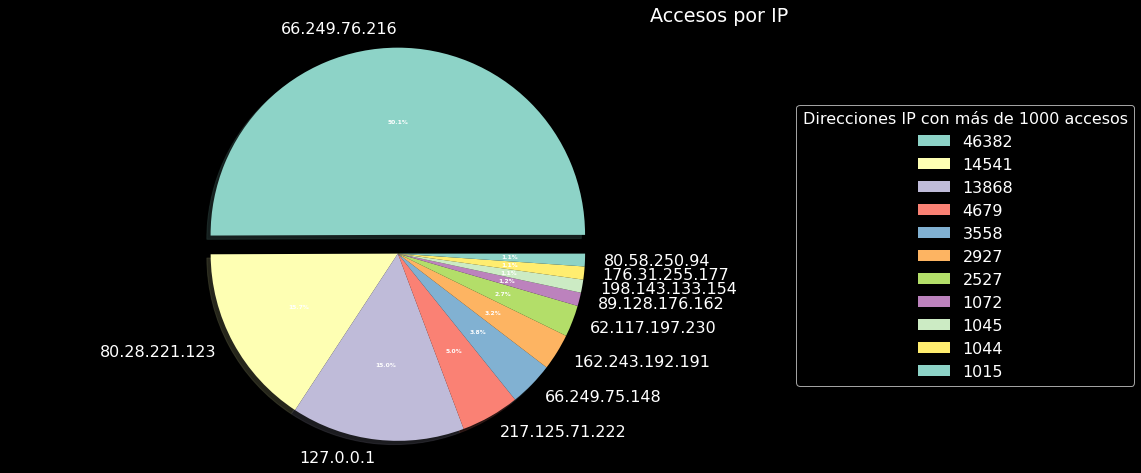

In [33]:
# Crearemos un Pie Chart, con las IPs con más de 1000 accesos
explode = (df_ip_mayor_1000['Counts'] == df_ip_mayor_1000['Counts'].max()) * 0.1 # Utilizamos un df de booleans para darle valor al valor máximo y separarlo en el gráfico 

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(df_ip_mayor_1000['Counts'], explode = explode, labels = df_ip_mayor_1000.IP, autopct='%1.1f%%', shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(wedges, df_ip_mayor_1000.Counts,
          title="Direcciones IP con más de 1000 accesos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=6, weight="bold")

ax1.set_title("Accesos por IP", loc='right')
plt.show()
fig1.savefig(r'Plots\01_Accesos_por_IP_PiePlot.png')


Visualmente queda curioso, pero no aporta mucho valor al análisis. Agruparemos los accesos por País y Ciudad, para ver desde dónde se accede más.

In [34]:
# Agrupamos por Ciudad y seleccionamos aquellas ciudades con más de 500 accesos
df_ip_por_ciudad = df_ip.groupby('Ciudad')['Counts'].sum()
df_ip_por_ciudad = df_ip_por_ciudad.sort_values(ascending=False)
df_ip_por_ciudad_mayor_500 = df_ip_por_ciudad[df_ip_por_ciudad >= 500]
df_ip_por_ciudad_mayor_500


Ciudad
Madrid                      65720
Mountain View               53251
Pozuelo de Alarcón          22259
Barcelona                    9651
Vigo                         5331
Seville                      5179
Murcia                       4630
Bridgewater Township         3271
Newark                       3256
Lavapiés                     2999
New York                     2927
Stockholm (Kista)            2121
Donostia / San Sebastian     2030
Chicago                      1752
Málaga                       1207
Alcobendas                   1152
Oviedo                       1099
Falkenstein                  1098
Chicago (Loop)               1045
Roubaix                      1044
Lleida                        937
Road Town                     716
Bilbao                        673
Ashburn                       532
Sant Antoni de Portmany       521
Écija                         516
Montreal                      511
Abarán                        501
Name: Counts, dtype: int64

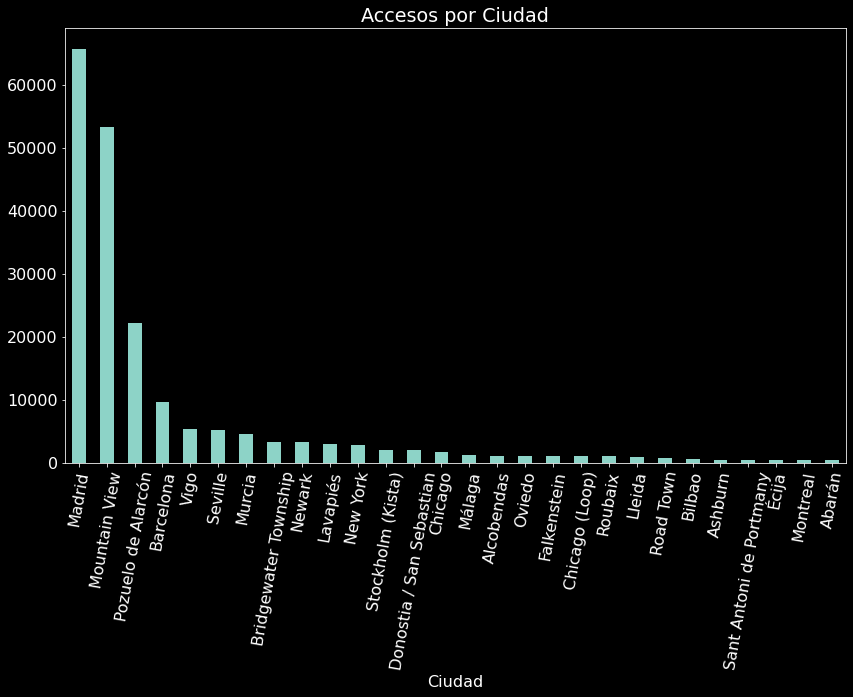

In [35]:
df_ip_por_ciudad_mayor_500.plot(kind = 'bar', title = 'Accesos por Ciudad', rot = 80).figure.savefig(r'Plots\02_Accesos_por_Ciudad_barplot.png')

In [36]:
# Agrupamos por País
df_ip_por_pais = df_ip.groupby('País')['Counts'].sum()
df_ip_por_pais = df_ip_por_pais.sort_values(ascending=False)
df_ip_por_pais

País
ES    132429
US     67917
SE      2121
FR      1416
DE      1246
IT      1023
AR       745
VG       716
BR       656
GB       627
RU       537
MX       519
CA       511
NL       426
PT       376
CO       315
EC       239
UY       230
CN       183
AD       170
CL       147
CH       142
BQ       125
AT       102
GT        97
DO        88
DZ        86
PR        81
PE        80
AU        78
VE        73
NI        72
IE        68
EG        68
NG        60
MN        58
Name: Counts, dtype: int64

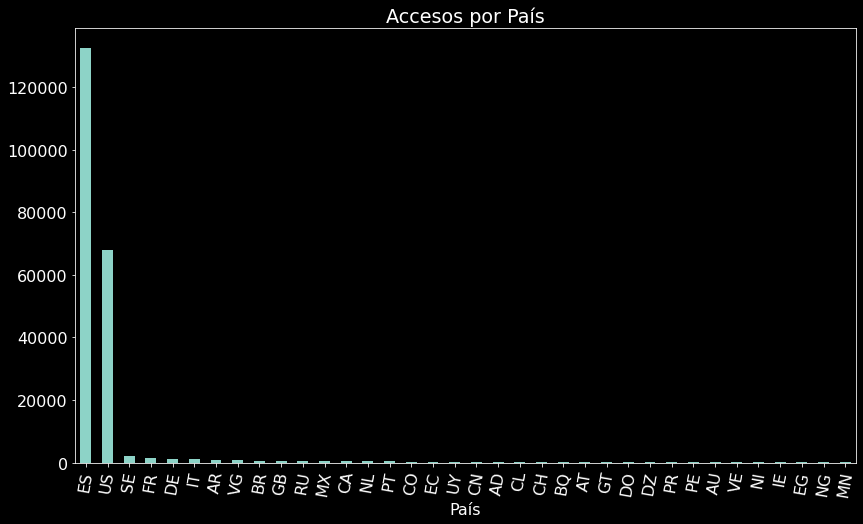

In [37]:
df_ip_por_pais.plot(kind = 'bar', title = 'Accesos por País', rot = 80).figure.savefig(r'Plots\03_Accesos_por_País_barplot.png')

#### Vamos a probar de crear un mapa con los accesos por Ciudad/País/dirección
Ya tenemos la Ciudad, la Región, el País y la latidud y longitud desde la cual se ha accedido a la web en el df_ip

In [1]:
import geopandas
import folium
from folium import plugins

In [2]:
# Código de comprobación del correcto funcionamiento del paquete "geopandas"
path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [40]:
# Modificamos el df para adaptarlo a geopandas

# Create point geometries
geometry = geopandas.points_from_xy(df_ip.Longitud, df_ip.Latitud)
geo_df = geopandas.GeoDataFrame(df_ip[['IP','Ciudad','Región', 'País', 'Latitud', 'Longitud', 'Counts']], geometry=geometry)

geo_df.head()

,IP,Ciudad,Región,País,Latitud,Longitud,Counts,geometry
0,66.249.76.216,Mountain View,California,US,37.000000,-122.000000,46382,POINT (-122.00000 37.00000)
1,80.28.221.123,Madrid,Madrid,ES,40.000000,-3.000000,14541,POINT (-3.00000 40.00000)
2,127.0.0.1,NaN,NaN,NaN,NaN,NaN,13868,POINT (nan nan)
3,217.125.71.222,Madrid,Madrid,ES,40.416705,-3.703582,4679,POINT (-3.70358 40.41670)
4,66.249.75.148,Mountain View,California,US,37.389389,-122.083210,3558,POINT (-122.08321 37.38939)


In [41]:
# Eliminamos los NaN para que funcione el heatmap
geo_df = geo_df.dropna()
df_ip = df_ip.dropna()
geo_df.head()

,IP,Ciudad,Región,País,Latitud,Longitud,Counts,geometry
0,66.249.76.216,Mountain View,California,US,37.000000,-122.000000,46382,POINT (-122.00000 37.00000)
1,80.28.221.123,Madrid,Madrid,ES,40.000000,-3.000000,14541,POINT (-3.00000 40.00000)
3,217.125.71.222,Madrid,Madrid,ES,40.416705,-3.703582,4679,POINT (-3.70358 40.41670)
4,66.249.75.148,Mountain View,California,US,37.389389,-122.083210,3558,POINT (-122.08321 37.38939)
5,162.243.192.191,New York,New York,US,40.712728,-74.006015,2927,POINT (-74.00602 40.71273)


In [42]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.

from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)
map.save(r'Plots\04_HeatMap.html')
map

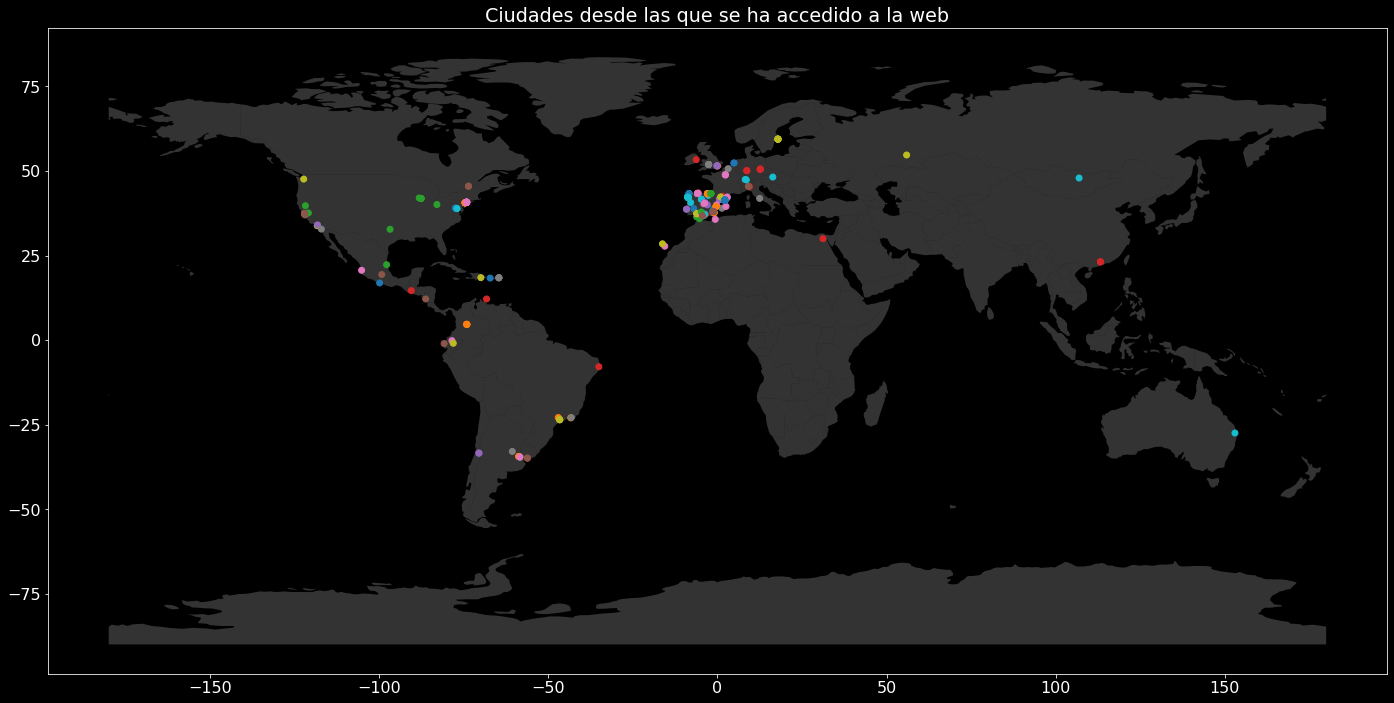

In [43]:
# Probaremos con otro tipo de mapa también
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='Ciudad', ax=ax)
plt.title('Ciudades desde las que se ha accedido a la web')
fig.savefig(r'Plots\05_Ciudades_Acceso.png')
plt.show()

In [44]:
# Por último, probaremos de crear un mapa en el que aparezcan marcadores con la información de cuantos accesos se han realizado

# OpenStreetMap
map = folium.Map(location = [40.4167, -3.70325], tiles='OpenStreetMap' , zoom_start = 10)

# insert multiple markers, iterate through list
# add a different color marker associated with type of volcano

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]
popup_IP_list = geo_df.IP.to_list()
popup_Counts_list = geo_df.Counts.to_list()

i = 0
for coordinates in geo_df_list:
    folium.Marker(location=coordinates, popup=f"IP: {popup_IP_list[i]}\nAccesos: {popup_Counts_list[i]}", icon=folium.Icon(icon="info-sign")).add_to(map)
    i = i + 1

map.save(r'Plots\06_MarkersMap.html')
map